In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
churn = pd.read_csv(r"C:\Users\hi\Desktop\Data Analytics\Data Sets\Old\Telco_Cusomer_Churn.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Univariate Data Analysis

<Axes: title={'center': 'Customer Distribution by Gender'}>

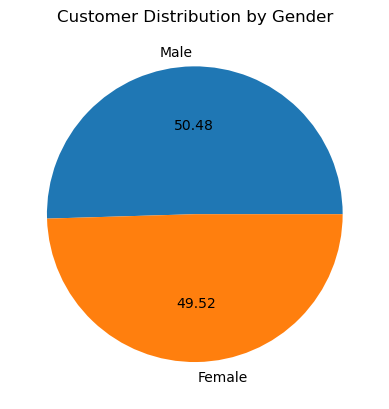

In [78]:
churn.gender.value_counts().plot(kind='pie',autopct='%0.2f', ylabel='', title='Customer Distribution by Gender')

In [79]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: title={'center': 'Distribution of type of Internet servive used by customers'}, xlabel='InternetService', ylabel='Count'>

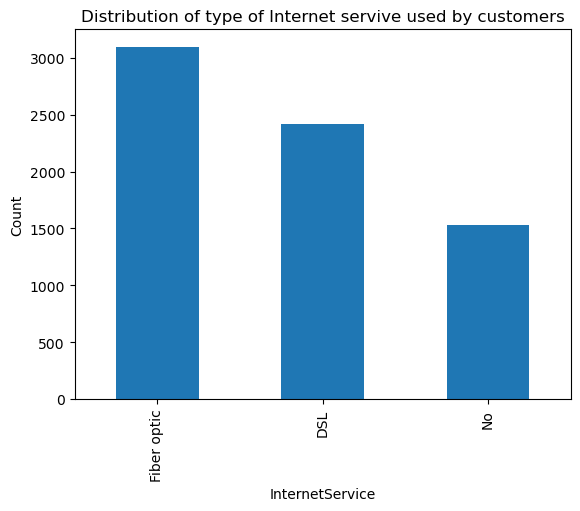

In [80]:
churn.InternetService.value_counts().plot(kind='bar', ylabel='Count', title='Distribution of type of Internet servive used by customers')

In [81]:
churn['count'] = 1
churn.groupby(churn.tenure)['count'].sum()

tenure
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: count, Length: 73, dtype: int64

In [82]:
#churn['tenure_bins']

In [83]:
churn['tenure_bins'] = pd.cut(churn.tenure, bins=[0,12,24,48,72]).astype('str')

churn['tenure_bins'] = churn['tenure_bins'].str.replace('(','[').str.replace(',',' -')
churn['tenure_bins'] = churn['tenure_bins'].astype('category')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [84]:
churn = churn[churn.tenure_bins != 'nan']

In [85]:
churn['tenure_bins'] = churn.tenure_bins.astype('str')
churn.tenure_bins.unique()

array(['[0 - 12]', '[24 - 48]', '[12 - 24]', '[48 - 72]'], dtype=object)

In [86]:
churn.groupby('tenure_bins')['tenure'].median().sort_values().index

Index(['[0 - 12]', '[12 - 24]', '[24 - 48]', '[48 - 72]'], dtype='object', name='tenure_bins')

In [87]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
count               0
tenure_bins         0
dtype: int64

In [88]:
churn['TotalCharges'] = churn['TotalCharges'].astype(float)

In [89]:
# categoric columns analysis
X = churn.drop(columns = ['Churn','customerID'])
cat_col = X.select_dtypes(include=['object']).columns
len(cat_col)

16

In [90]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,count,tenure_bins
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,[0 - 12]
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,1,[24 - 48]
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,[0 - 12]
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1,[24 - 48]
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,[0 - 12]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,1,[12 - 24]
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,1,[48 - 72]
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,1,[0 - 12]
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,[0 - 12]


# Categoric column Analysis both Univariate and Bivariate 

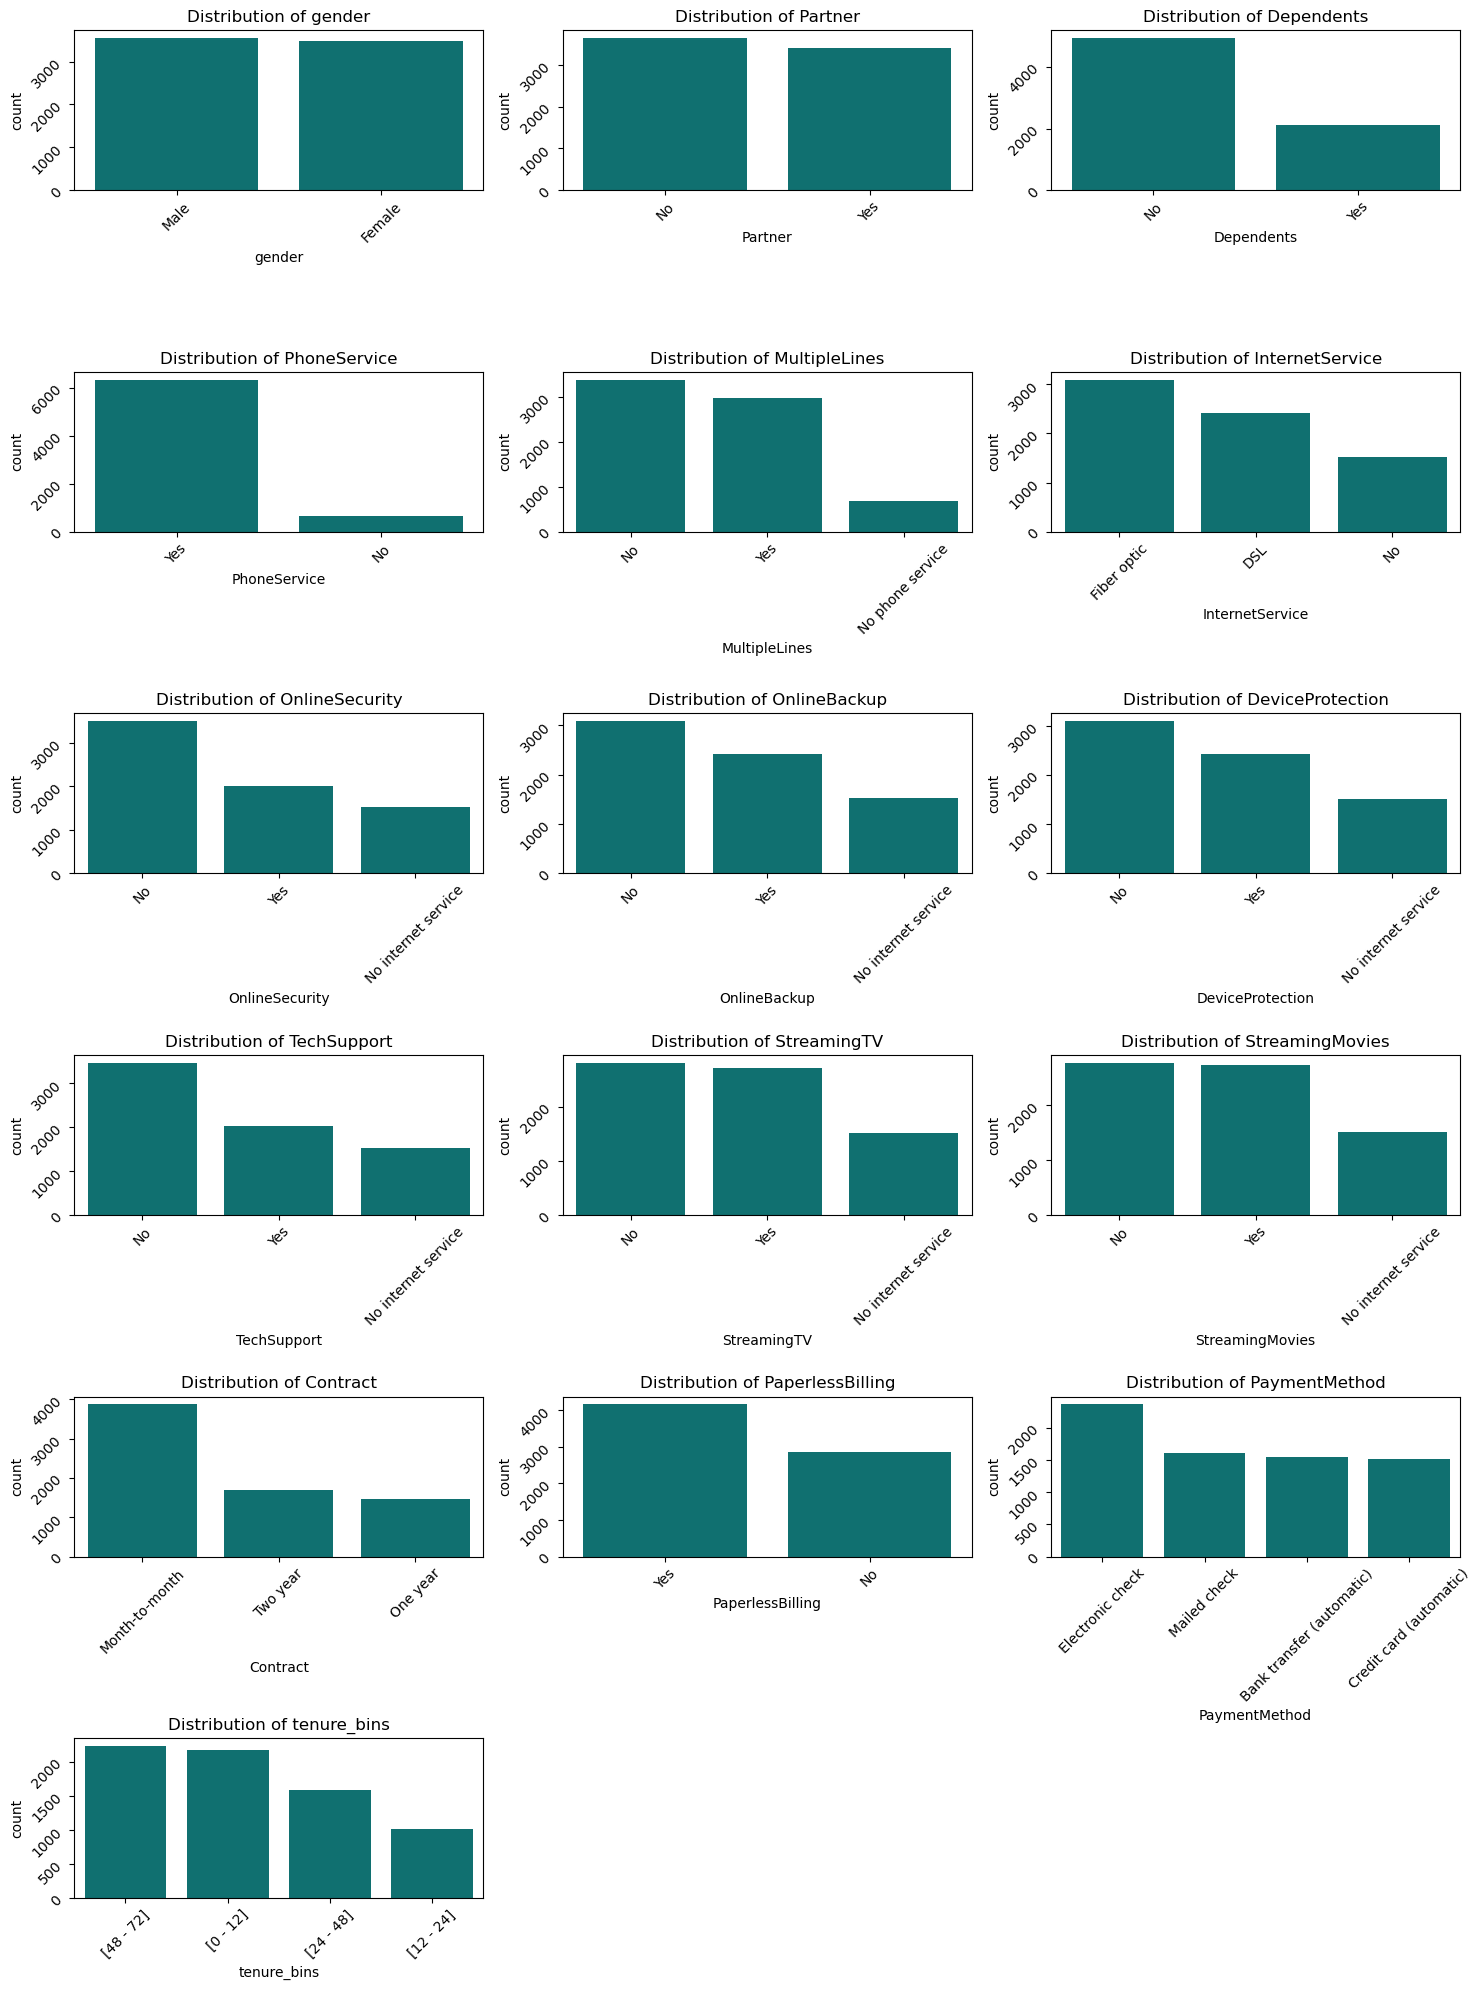

In [91]:
# plotting categoric columns
fig, ax=plt.subplots(6,3, figsize=(15,20))
ax = ax.flatten()

for i, col in enumerate(cat_col):
    order = X[col].value_counts().index
    sns.countplot(data=X, x=col,ax=ax[i], color='teal', order=order)
    ax[i].set_title(F'Distribution of {col}')
    ax[i].set_xlabel(f'{col}')
    ax[i].tick_params(rotation=45)

for ax in ax:
    if not ax.has_data():
        ax.remove()

plt.tight_layout()
plt.savefig('Distribution of Categoric Columns.png')
plt.show()


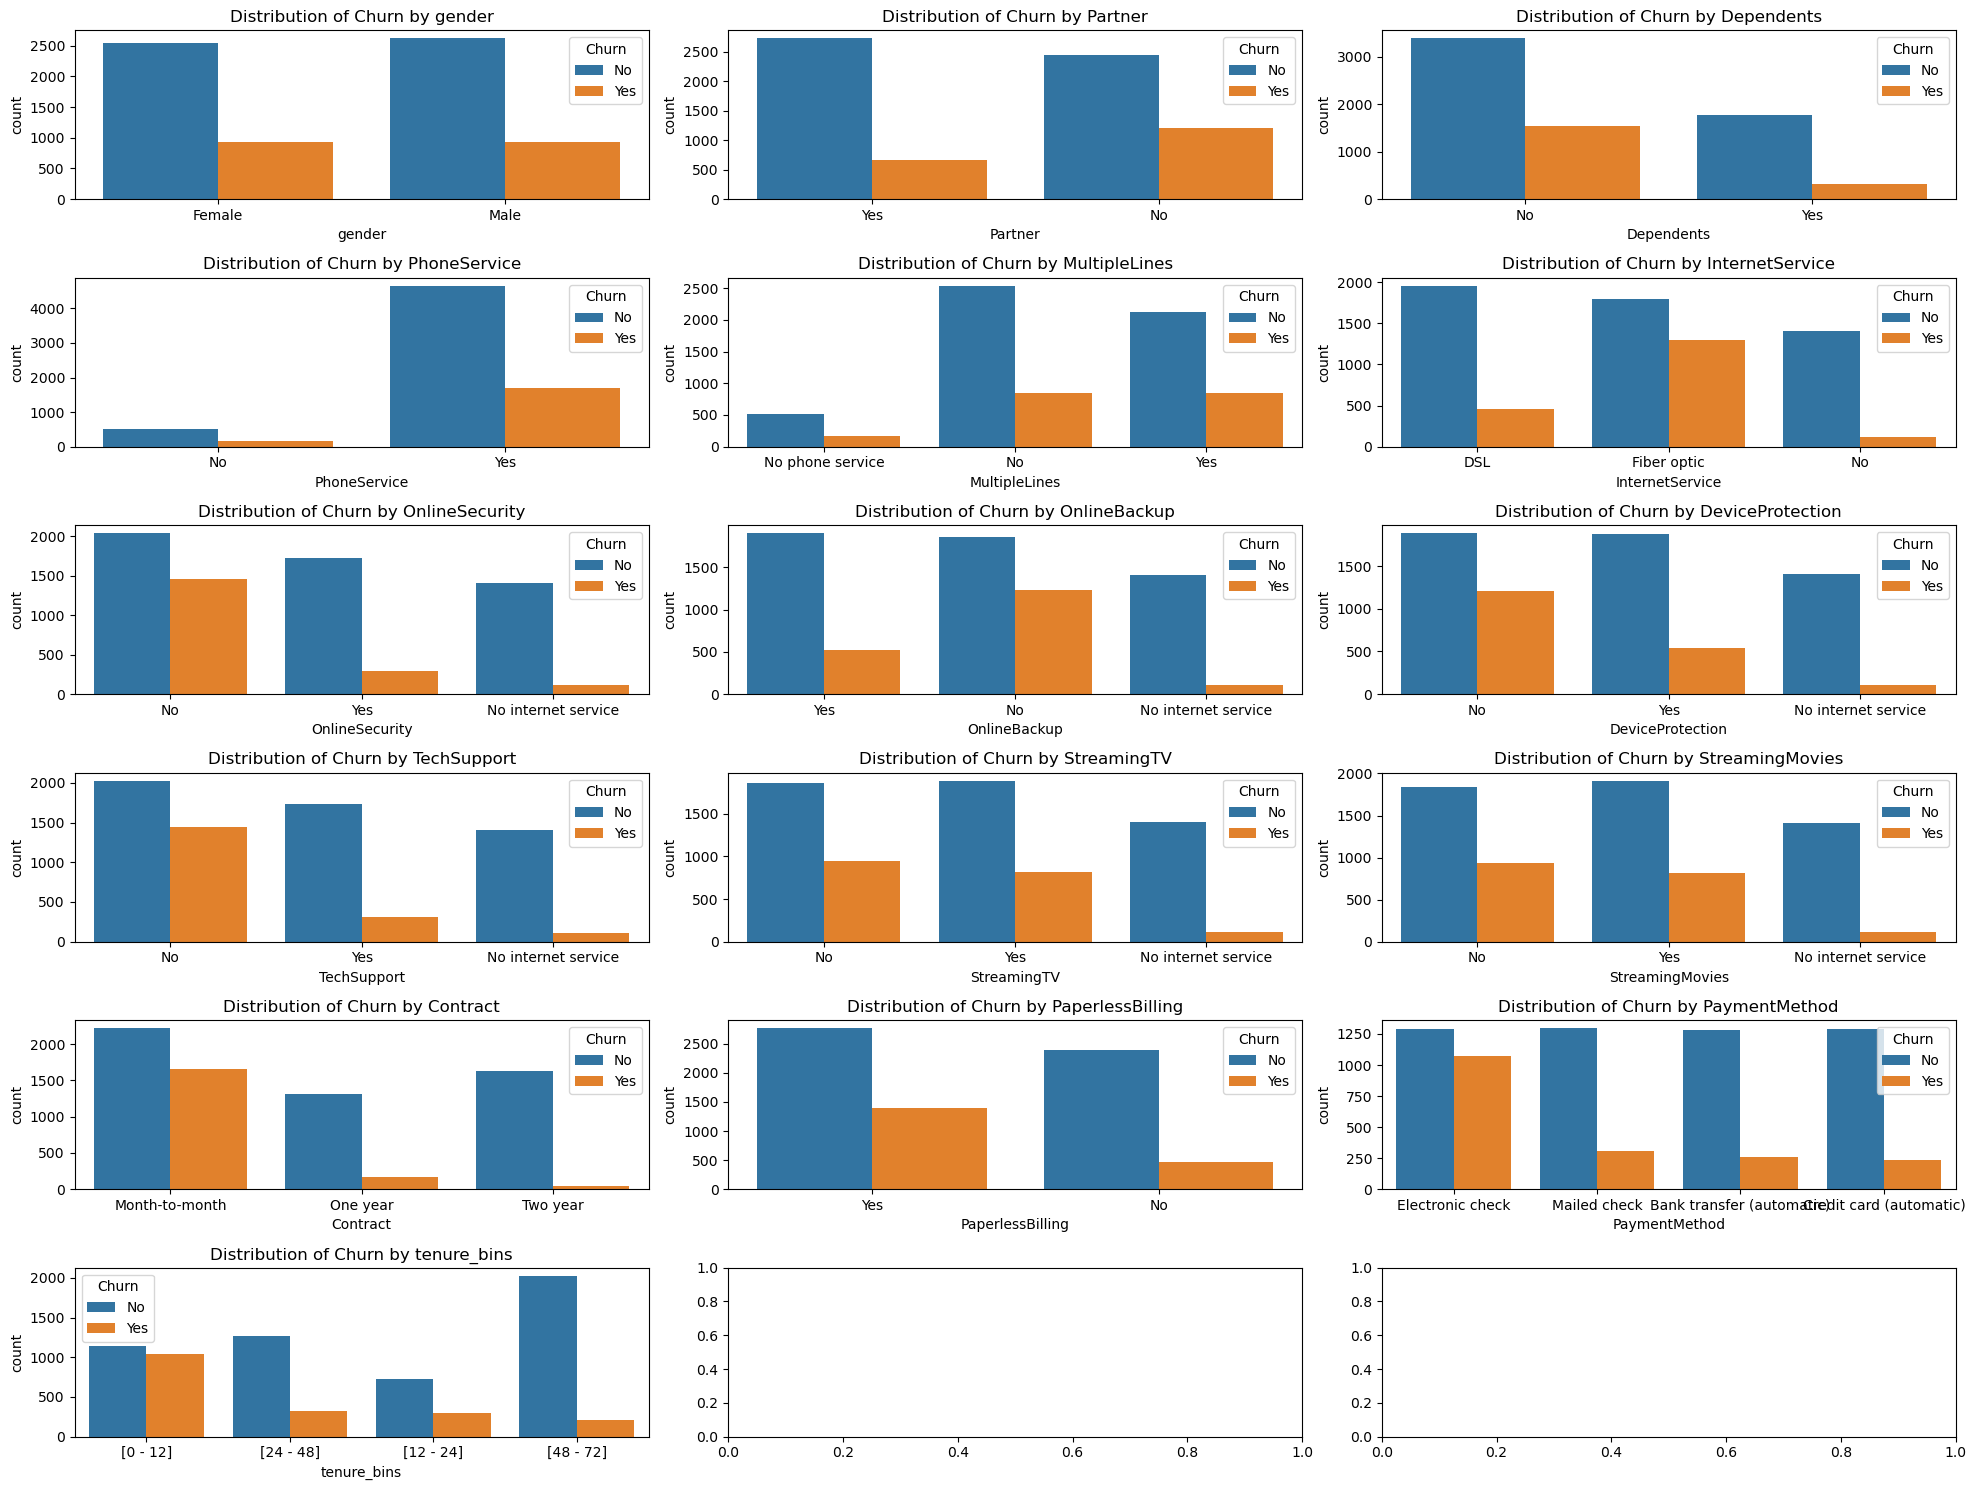

In [92]:
# bivariate analysis 
# how categoric columns impact the targer 'Churn'
fig, ax=plt.subplots(6,3, figsize=(20,15))
ax = ax.flatten()

for i, col in enumerate(cat_col):
    sns.countplot(data=churn, x=col, hue=churn['Churn'], ax=ax[i])
    ax[i].set_title(f'Distribution of Churn by {col}')
    ax[i]

plt.tight_layout()
plt.savefig('Distribution of Churn by Categoric Columns.png')
plt.show()

In [93]:
# distribution of numeric features
X = X.drop(columns='count')
X.select_dtypes(include=['float64','int64']).columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

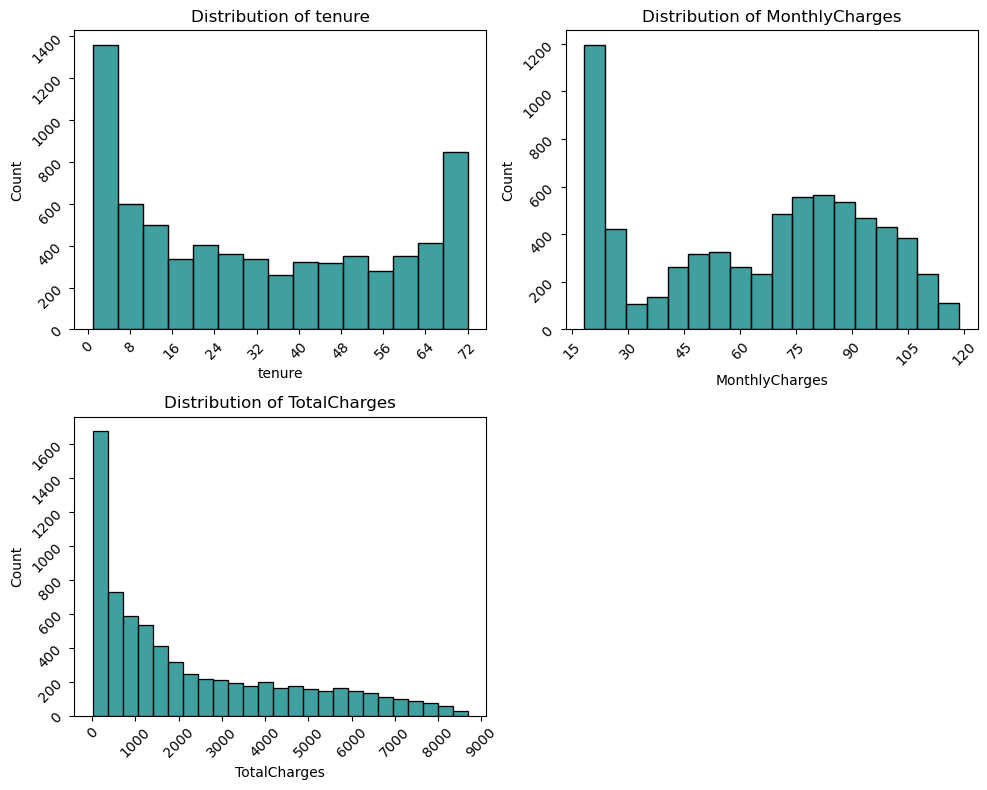

In [94]:
import matplotlib.ticker as ticker
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax=plt.subplots(2,2, figsize=(10,8))
ax = ax.flatten()
for i, col in enumerate(num_col):
    sns.histplot(data=X, x=col, ax=ax[i], color='teal',)
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(f'{col}')
    ax[i].tick_params(rotation=45)
    ax[i].xaxis.set_major_locator(ticker.MaxNLocator(10))

for ax in ax:
    if not ax.has_data():
        ax.remove()

plt.tight_layout()
plt.savefig('Distribution of Numeric Columns.png')
plt.show()

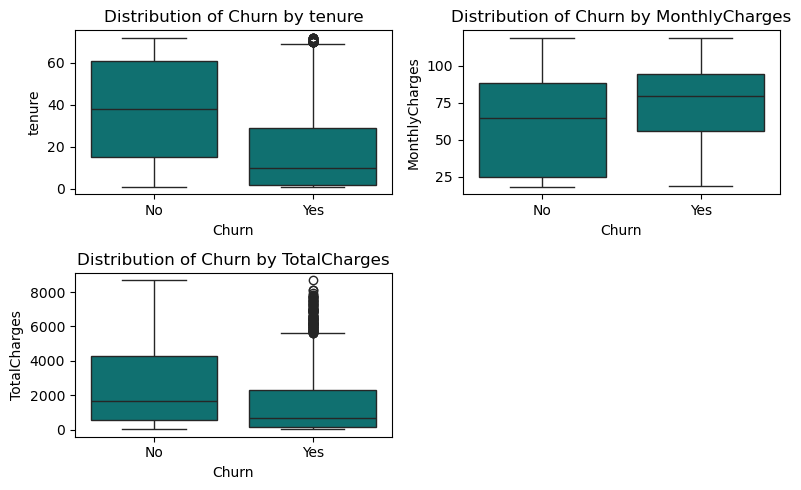

In [95]:
# distribution of churn by numeric columns
fig, ax=plt.subplots(2,2, figsize=(8,5))
ax = ax.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(data=churn, y= col, x='Churn', color='teal', ax=ax[i])
    ax[i].set_title(f'Distribution of Churn by {col}')
    ax[i].set_ylabel(col)
    ax[i].set_xlabel('Churn')

for ax in ax:
    if not ax.has_data():
        ax.remove()


plt.tight_layout()
plt.savefig('Distribution of Churn by Numeric Columns.png')
plt.show()

In [96]:
# plt.figure(figsize=(5,5))
# sns.countplot(data=churn, x='tenure_bins')
# plt.ylabel('Numner of Customers')
# plt.xlabel('tenure(Months)')
# plt.title('Distribution of tenure(Months)')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig('Distribution of tenure.png')
# plt.show()

In [97]:
# pd.set_option('display.max_columns', None)
# churn.head()

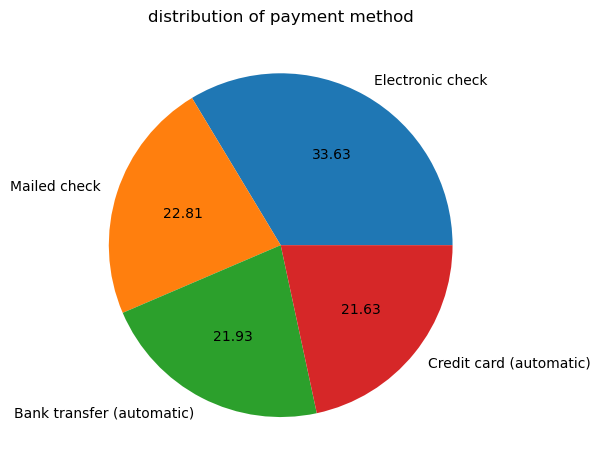

In [98]:
churn.PaymentMethod.value_counts().plot(kind='pie', autopct='%0.2f', ylabel='', title='distribution of payment method')
plt.tight_layout()
plt.savefig('distribution of payment method.png')

In [99]:
# plt.figure(figsize=(5,5))
# sns.countplot(data=churn, x='PaymentMethod')
# plt.xticks(rotation=79)
# plt.title('Distribution of Payment Methods')
# plt.tight_layout()
# plt.savefig('Distribution of Payment Methods.png')
# plt.show()

In [100]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'count',
       'tenure_bins'],
      dtype='object')

In [101]:
churned = churn[churn.Churn== 'Yes']

<Axes: title={'center': 'Distribution of Churned by Contract'}>

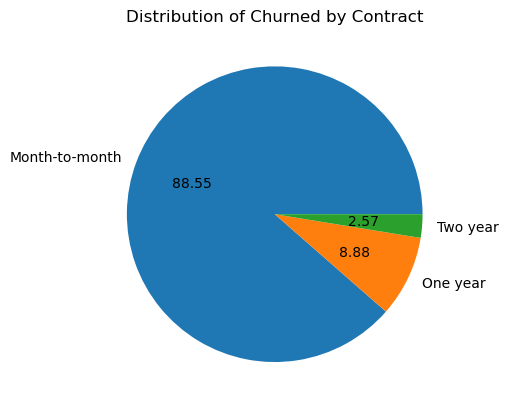

In [102]:
churned.Contract.value_counts().plot(kind='pie', autopct='%0.2f', ylabel='', title='Distribution of Churned by Contract')

## BIVARIATE ANALYSIS


In [103]:
#churn.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar', ylabel='Monthly Charges')

# MONTHLY CHARGES AND CHURN

In [104]:
# plt.figure(figsize=(5,7))
# sns.boxplot(x='Churn', y='MonthlyCharges' , data=churn)
# plt.title('Distribution of churn by Monthly Charges')
# plt.tight_layout()
# #plt.savefig('Distribution of churn by Monthly Charges.png')
# plt.show()

In [105]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'count',
       'tenure_bins'],
      dtype='object')

In [106]:
# plt.figure(figsize=(5,6))
# sns.violinplot(x='Churn', y='MonthlyCharges', data=churn, hue='Churn', palette='muted', legend=False)
# plt.title('Violin Plot of Monthly Charges by Churn')
# plt.xlabel('Churn Status')
# plt.ylabel('Monthly Charges ($)')
# plt.tight_layout()
# plt.savefig('churn_violin_plot.png')

# grouped chart of gender and churn

In [107]:
# sns.countplot(data=churn, x='gender', hue='Churn', )
# plt.title('Churn count by gender')
# plt.ylabel('gender count')
# plt.xlabel('gender')
# plt.tight_layout()
# plt.savefig('Churn count by gender.png')
# plt.show()

#### PAYMENT METHOD VS CHURN

In [108]:
# plt.figure(figsize=(8,5))
# sns.countplot(data=churn, x='PaymentMethod', hue='Churn')
# plt.xticks(rotation=45)
# plt.title('Distribution of churn by payment method')
# plt.tight_layout()
# plt.savefig('Distribution churn by payment method.png')
# plt.show()

### DISTRIBUTION OF CHURN BY INTERNET SERVICE

In [109]:
# plt.figure(figsize=(7,5))
# sns.countplot(data=churn, x='InternetService', hue='Churn', )
# plt.title('Distribution of churn by internet service')
# plt.tight_layout()
# plt.savefig('distribution_of_churn_by_internet_service.png')
# plt.show()

### DISTRIBUTION OF CHURN BY CONTRACT TYPE

In [110]:
# plt.figure(figsize=(6,5))
# sns.countplot(data=churn, x='Contract', hue='Churn')
# plt.title('Distribution of churn by contract type')
# plt.tight_layout()
# plt.savefig('distribution of churn by contract.png')
# plt.show